# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import the Data

2 Baskets of securities in the spreadsheet, PF1 and PF2

In sheet PF1
    a mix of stocks, commodities and stock indexes
    Amazon, American Airlines, SP500, Euronext100, Gold, Oil
    
In sheet PF2
    CenterPoint Energy(CNP), Ford, Walmart, General Electric, Tesla, Toyota
    
Change the sheet_name parameter below to be 'PF1' or 'PF2'

## Either from a spreadhsheet


In [2]:
df = pd.read_excel(io='../Data/Portfolio.xlsx', sheet_name='PF2', index_col = 'Date')

# Display the first 5 and last 5 rows
pd.concat([df.head(), df.tail()])

,CNP,F,WMT,GE,TSLA,TM
Date,,,,,,
2019-05-01,29.247795,9.817699,99.006989,10.060271,234.009995,121.293808
2019-05-02,29.219288,9.855827,98.801857,10.209681,244.100006,120.968170
2019-05-03,29.599377,9.922548,99.710289,10.458698,255.029999,122.014153
2019-05-06,29.504354,9.884421,100.081451,10.388973,255.339996,121.353020
2019-05-07,29.276300,9.893953,98.948395,10.070231,247.059998,120.879364
2020-05-20,16.920000,5.490000,125.449997,6.420000,815.559998,119.820000
2020-05-21,16.760000,5.630000,124.989998,6.480000,827.599976,117.949997
2020-05-22,16.920000,5.650000,124.330002,6.410000,816.880005,117.559998
2020-05-26,17.490000,5.840000,123.860001,6.800000,818.869995,124.110001


## Download from Yahoo Finance

In [3]:
import yfinance as yf

stocks = 'META BTC-USD AMZN NFLX GOOGL TSLA F JPM GLD'.split()
df = yf.download(stocks, '2020-1-1')['Adj Close']

df

[*********************100%***********************]  9 of 9 completed


,AMZN,BTC-USD,F,GLD,GOOGL,JPM,META,NFLX,TSLA
Date,,,,,,,,,
2019-12-31,92.391998,7193.599121,8.903501,142.899994,66.969498,128.342957,205.250000,323.570007,83.666000
2020-01-01,NaN,7200.174316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,94.900497,6985.470215,9.018383,143.949997,68.433998,129.898941,209.779999,329.809998,86.052002
2020-01-03,93.748497,7344.884277,8.817337,145.860001,68.075996,128.184738,208.669998,325.899994,88.601997
2020-01-04,NaN,7410.656738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-17,142.100006,23335.998047,16.030001,164.350006,119.550003,122.589996,174.850006,241.149994,911.989990
2022-08-18,142.300003,23212.738281,16.150000,163.919998,120.169998,121.639999,174.660004,245.169998,908.609985
2022-08-19,138.229996,20877.552734,15.880000,162.720001,117.209999,118.629997,167.960007,241.160004,890.000000


In [4]:
df.head(1)

,AMZN,BTC-USD,F,GLD,GOOGL,JPM,META,NFLX,TSLA
Date,,,,,,,,,
2019-12-31,92.391998,7193.599121,8.903501,142.899994,66.969498,128.342957,205.25,323.570007,83.666


In [5]:
df[-1:]

,AMZN,BTC-USD,F,GLD,GOOGL,JPM,META,NFLX,TSLA
Date,,,,,,,,,
2022-08-21,NaN,21383.564453,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail(1)

,AMZN,BTC-USD,F,GLD,GOOGL,JPM,META,NFLX,TSLA
Date,,,,,,,,,
2022-08-21,NaN,21383.564453,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# df = df[-253:]
# df

# Plot some Charts

Nothing sophisticated, just enough to see how the various securities have performed

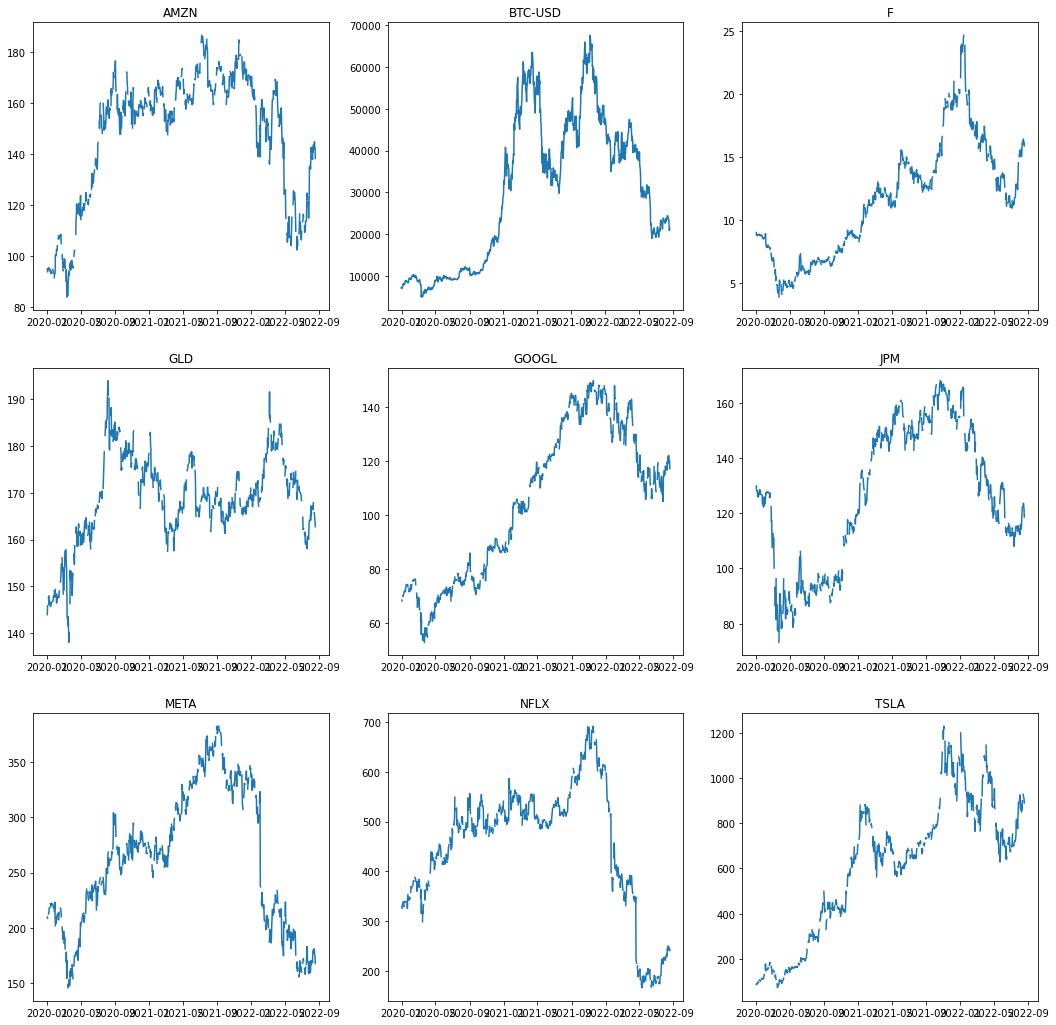

In [8]:
num_securities = len(df.columns)
fig = plt.figure(figsize=(18,18))

for i in range(0, num_securities):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_title(df.columns[i])
    ax.plot(df[df.columns[i]])

plt.show()

# Perform some calculations

- Daily returns
- Annual returns
- Daily covariance of daily returns
- Annual covariance of daily returns

**Note** these do not beed to be for a year, they do need to be for the period in question

In [9]:
daily_ret = df.pct_change()

NUM_DAYS = daily_ret.count()

annual_ret = daily_ret.mean() * NUM_DAYS

cov_daily = daily_ret.cov()

cov_annual = cov_daily * NUM_DAYS

# Calculate the Efficient frontier

Obtained by simulating imaginary combinations of portfolios 
(50,000 portfolios of different combinations in this case).

In [10]:
# set the number of combinations for imaginary portfolios
NUM_ASSETS = len(df.columns)
NUM_PORTFOLIOS = 50000


In [11]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []


In [12]:
# populate the empty lists with each portfolios returns,risk and weights

for portfolio in range(NUM_PORTFOLIOS):
    
    weights = np.random.random(NUM_ASSETS)
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
# Create a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}


In [13]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
assets = df.columns

for counter,asset in enumerate(assets):
    portfolio[asset+' Weight'] = [Weight[counter] for Weight in stock_weights]


In [14]:
# make a nice dataframe of the extended dictionary
df_portfolio = pd.DataFrame(portfolio)

df_portfolio.head()

,Returns,Volatility,AMZN Weight,BTC-USD Weight,F Weight,GLD Weight,GOOGL Weight,JPM Weight,META Weight,NFLX Weight,TSLA Weight
0,0.936364,0.506382,0.189521,0.146236,0.015084,0.152899,0.013987,0.144182,0.115824,0.068191,0.154076
1,0.789686,0.515502,0.123788,0.133936,0.187554,0.035394,0.058258,0.259749,0.066112,0.066665,0.068545
2,0.570969,0.448129,0.081063,0.115048,0.143915,0.147228,0.157764,0.148014,0.137523,0.066255,0.003190
3,0.765768,0.557336,0.020710,0.156205,0.080478,0.033220,0.084162,0.120722,0.210164,0.202957,0.091382
4,0.914596,0.515149,0.196040,0.146490,0.138034,0.044704,0.195941,0.074457,0.042860,0.083933,0.077540


# Visualize the Efficient Frontier for this portfolio

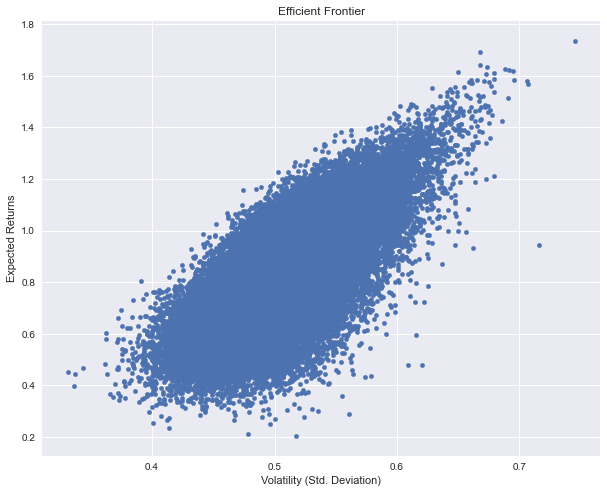

In [15]:
plt.style.use('seaborn')
df_portfolio.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

# Calculate the Sharpe Ratio

50,000 portfolios with different combinations of weights generated different expected returns and expected volatility. <BR>
Each point lying on the line represents an optimal combination of assets in a portfolio that maximises the expected return for the given level of risk <BR>
<BR><BR>
If all points on the Efficient Frontier curve are optimal combinations
- What is the optimal portfolio among the various optimal combinations? 
- What would even the criteria for choosing this *best of the best* combinations?
    
**Sharpe Ratio**<BR>
Use the `Sharpe Ratio` to measure the performance of an investments returns given its risk.
This ratio adjusts the returns of an investment which makes it possible to compare different investments on a scale that incorporates risk. <BR>
Without this scale of comparison, it would be virtually impossible to compare different investments with different combinations and their accompanying risks and returns.
    
    
The expected returns and returns of our simulated portfolios are already known. <BR>
Repeat the above process but include a calculation their risk-adjusted returns (with the help of the Sharpe Ratio), and make a colour bar of the plots using the Sharpe Ratio as the colour map

In [16]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

#set random seed for reproduction's sake
np.random.seed(42)

for portfolio in range(NUM_PORTFOLIOS):
    
    weights = np.random.random(NUM_ASSETS)
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
# Create a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
assets = df.columns

for counter,asset in enumerate(assets):
    portfolio[asset+' Weight'] = [Weight[counter] for Weight in stock_weights]
    
# make a nice dataframe of the extended dictionary
df_portfolio = pd.DataFrame(portfolio)


# Visualize the Efficient Frontier for this portfolio

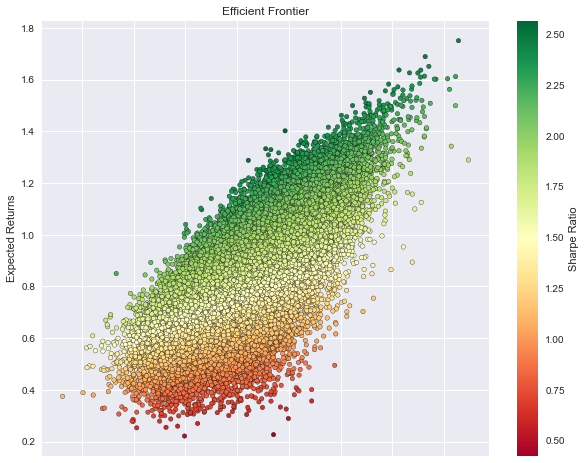

In [24]:
plt.style.use('seaborn-dark')
df_portfolio.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                          cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

# Locate the optimal Portfolio and least optimal portfilio


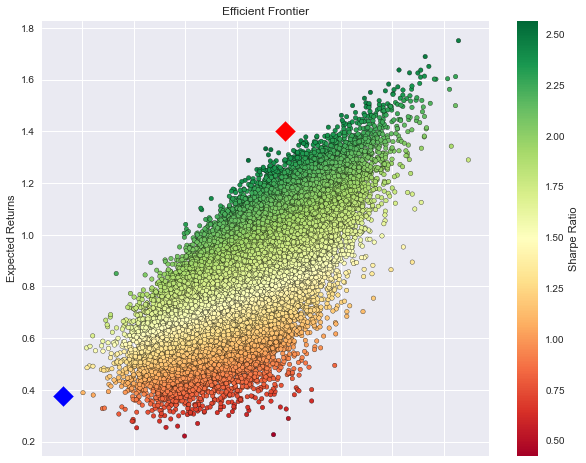

In [18]:
# find min Volatility & max sharpe values in the dataframe 
is_min_vol = df_portfolio['Volatility'] ==  df_portfolio['Volatility'].min()
is_max_sharpe = df_portfolio['Sharpe Ratio'] == df_portfolio['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
max_sharpe_port = df_portfolio.loc[is_max_sharpe]
min_vol_port = df_portfolio.loc[is_min_vol]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df_portfolio.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                          cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=max_sharpe_port['Volatility'], y=max_sharpe_port['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_vol_port['Volatility'], y=min_vol_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

To get specific details of these two special portfolios

In [19]:
min_vol_port

,Returns,Volatility,Sharpe Ratio,AMZN Weight,BTC-USD Weight,F Weight,GLD Weight,GOOGL Weight,JPM Weight,META Weight,NFLX Weight,TSLA Weight
3134,0.375151,0.331384,1.132072,0.11488,0.004666,0.066959,0.426276,0.138304,0.047063,0.051359,0.134213,0.01628


In [20]:
# print the details of the 2 special portfolios
print("Portfolio for Risk Averse investors")
print(min_vol_port.transpose())

print("\n\nPortfolio for Investors seeking max return")
print(max_sharpe_port.transpose())

Portfolio for Risk Averse investors
                    3134
Returns         0.375151
Volatility      0.331384
Sharpe Ratio    1.132072
AMZN Weight     0.114880
BTC-USD Weight  0.004666
F Weight        0.066959
GLD Weight      0.426276
GOOGL Weight    0.138304
JPM Weight      0.047063
META Weight     0.051359
NFLX Weight     0.134213
TSLA Weight     0.016280


Portfolio for Investors seeking max return
                   35497
Returns         1.402005
Volatility      0.546361
Sharpe Ratio    2.566080
AMZN Weight     0.019218
BTC-USD Weight  0.075119
F Weight        0.191745
GLD Weight      0.323875
GOOGL Weight    0.015272
JPM Weight      0.032422
META Weight     0.012045
NFLX Weight     0.001862
TSLA Weight     0.328441


**Risk-averse investors** <BR>
would construct the minimum volatility portfolio 

**Investors seeking maximum risk-adjusted return** <BR>
would construct the max Sharpe Ratio portfolio 

In [21]:
type(min_vol_port)

pandas.core.frame.DataFrame

In [22]:
min_vol_port.index

Int64Index([3134], dtype='int64')

In [23]:
min_vol_port.transpose().index.values

array(['Returns', 'Volatility', 'Sharpe Ratio', 'AMZN Weight',
       'BTC-USD Weight', 'F Weight', 'GLD Weight', 'GOOGL Weight',
       'JPM Weight', 'META Weight', 'NFLX Weight', 'TSLA Weight'],
      dtype=object)